## TASK-3

`Correlation between News anad Stock Movement`

`Loading the Date`

In [14]:
import os
os.chdir('../scripts')

In [16]:
%load_ext autoreload
%autoreload 2

import data_processing as dp
import correlation as corr
import visualization as vis


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
news_data = dp.load_data('../datas/raw_analyst_ratings.csv')
stock_data = dp.load_data('../datas/yfinance_data/AMZN_historical_data.csv')

print(stock_data.head())
print(news_data.head())

         Date      Open      High       Low     Close  Adj Close      Volume  \
0  1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   0.086458   294000000   
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   0.085417   122136000   
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   0.081771   109344000   
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   0.071354   377064000   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4    

`Normalize Dates`

In [7]:
merged_data = corr.normalizeAndMerge_data(news_data, stock_data)
print(merged_data.head())

   Unnamed: 0                                           headline  \
0          10    30 Stocks Moving in Friday's Pre-Market Session   
1          11  SVB Leerink Maintains Outperform on Agilent Te...   
2          12  8 Stocks Moving In Thursday's After-Hours Session   
3          13  Agilent Technologies shares are trading higher...   
4          14  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   

                                                 url                publisher  \
0  https://www.benzinga.com/news/20/05/16092879/3...               Lisa Levin   
1  https://www.benzinga.com/news/20/05/16092270/s...  vishwanath@benzinga.com   
2  https://www.benzinga.com/news/20/05/16089803/8...             Tyree Gorges   
3  https://www.benzinga.com/wiim/20/05/16089218/a...        Benzinga Newsdesk   
4  https://www.benzinga.com/news/earnings/20/05/1...        Benzinga Newsdesk   

        date stock        Date        Open        High         Low  \
0 2020-05-22     A  2020-05-22  12

`Perform Sentiment Analysis`

In [8]:
merged_data['sentiment'] = dp.analyze_sentiment(merged_data)['sentiment']

merged_data['sentiment'].head()

100%|██████████| 1325/1325 [03:42<00:00,  5.97it/s]


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock', 'Date',
       'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits', 'sentiment'],
      dtype='object')


0    0.000
1    0.000
2    0.000
3    0.296
4    0.000
Name: sentiment, dtype: float64

In [9]:
merged_data['sentiment'].describe()

count    1.324416e+06
mean     6.665221e-02
std      2.696440e-01
min     -9.578000e-01
25%      0.000000e+00
50%      0.000000e+00
75%      2.023000e-01
max      9.741000e-01
Name: sentiment, dtype: float64

`Calculate Stock Movements`

`Compute Daily Returns`

In [10]:
stock_data['daily_return'] = stock_data['Close'].pct_change()

merged_data = merged_data.dropna()

In [11]:
daily_sentiment = merged_data.groupby('date')['sentiment'].mean().reset_index()


`Visualize sentiment score over time`

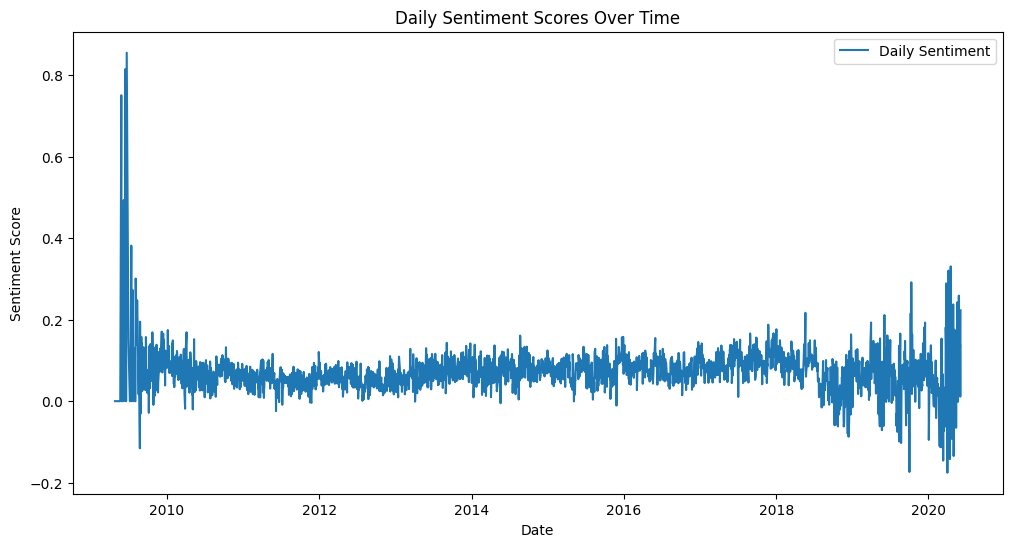

In [12]:
vis.plot_sentimentScore_over_time(daily_sentiment['date'], daily_sentiment['sentiment'], 'Daily Sentiment', 'Daily Sentiment Scores Over Time', 'Date', 'Sentiment Score')

`Calculate Correlation`

In [21]:
import importlib
importlib.reload(corr)

correlation_data = corr.calculate_correlation(daily_sentiment, stock_data,)

`Visualize the correlation`

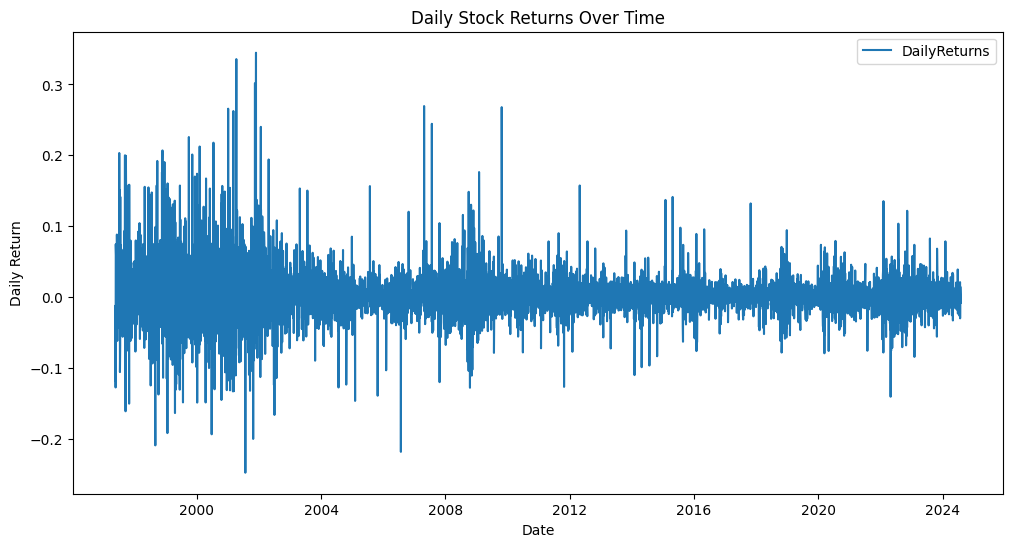

In [23]:
importlib.reload(vis)

vis.plot_relation_of_varibles(stock_data['date'], stock_data['daily_return'], 'DailyReturns', 'Daily Stock Returns Over Time', 'Date', 'Daily Return')

In [24]:
correlation = correlation_data['sentiment'].corr(correlation_data['daily_return'])
print(f"Pearson correlation coeffiecient: {correlation}")

Pearson correlation coeffiecient: 0.08426543771244625


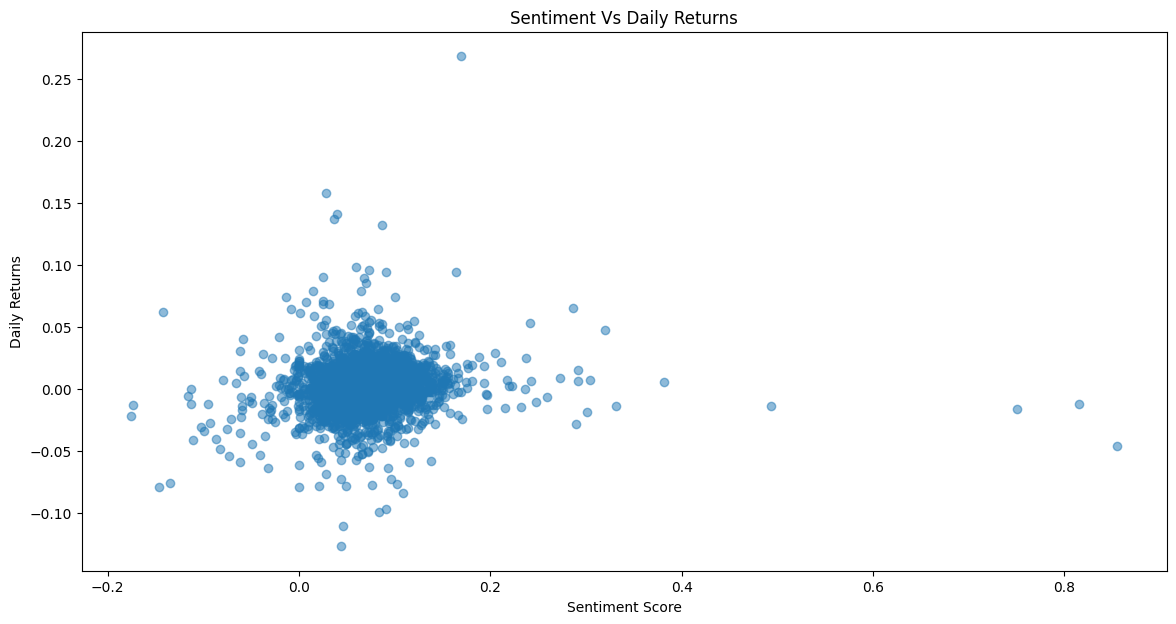

In [27]:
importlib.reload(vis)

vis.scatter_plot(correlation_data['sentiment'], correlation_data['daily_return'], 0.5, 'Sentiment Vs Daily Returns', 'Sentiment Score', 'Daily Returns')